In [ ]:
# Homework

The following defines a directed cycle with ten nodes:

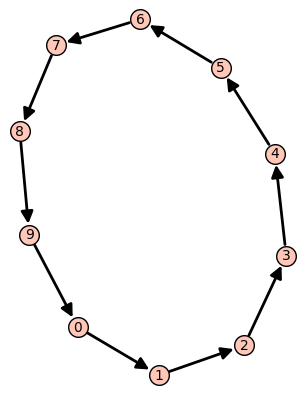

In [2]:
D1 = DiGraph([(i, (i+1)%10) for i in range(10)]); D1.show()

Define the same **directed graph** using:

1. an adjacency matrix
2. an incidence matrix
3. a boolean function

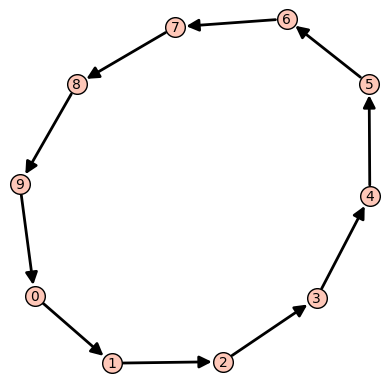

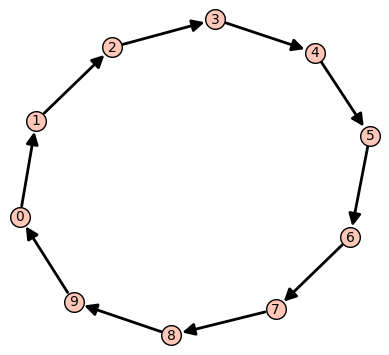

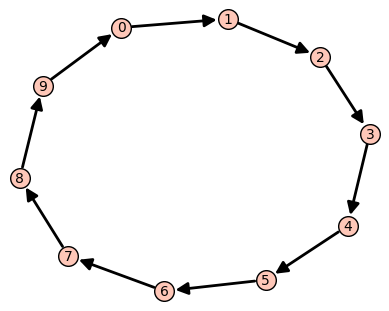

In [28]:
# From an adjacency matrix
A1 = Matrix(ZZ, 10, 10)
for i in range(9):
    A1[i, i+1] = 1
A1[9, 0] = 1
D2 = DiGraph(A1, format='adjacency_matrix')
D2.show()

# From an incidence matrix
A2 = Matrix(ZZ, 10, 10)
for i in range(9):
    A2[i, i] = 1
    A2[i, i+1] = -1
A2[9, 0] = -1
A2[9, 9] = 1
D3 = DiGraph(A2, format='incidence_matrix')
D3.show()

# From a boolean function
D4 = DiGraph([range(10), lambda i,j: j-i == 1 or (i==9 and j==0) ])
D4.show()

In [29]:
print A2

[ 1 -1  0  0  0  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0  0  0]
[ 0  0  1 -1  0  0  0  0  0  0]
[ 0  0  0  1 -1  0  0  0  0  0]
[ 0  0  0  0  1 -1  0  0  0  0]
[ 0  0  0  0  0  1 -1  0  0  0]
[ 0  0  0  0  0  0  1 -1  0  0]
[ 0  0  0  0  0  0  0  1 -1  0]
[ 0  0  0  0  0  0  0  0  1 -1]
[-1  0  0  0  0  0  0  0  0  1]


## Getting the spanning tree from a traversal

Modify the code for graph traversal below to return the resulting spanning tree, rather than just the traversal.

### Hint:
You need to maintain a pointer to where each node in ``can_visit`` "came from".

In [ ]:
from collections import deque
def traversal(G, root, algorithm):
    r"""
    Return a traversal of ``G`` starting with root node ``r`` using DFS or BFS.
    
    INPUT:
    
    ``G`` - a graph or directed graph
    ``r`` - a node of ``G``
    ``algorithm`` - 'DFS' or 'BFS'
    """
    T = Graph()
    n = root
    traversal = [n]
    can_visit = deque(G.neighbors(n))
    myDict = []
    tmp = G.neighbors(n)
    for i in range(len(tmp)):
        myDict.append((n, tmp[i]))
    while can_visit: # this runs so long as can_visit is non-empty
        if algorithm == 'DFS':
            m = can_visit.pop()
        elif algorithm == 'BFS':
            m = can_visit.popleft()
        else:
            raise ValueError('algorithm should be DFS or BFS')
        
        
        if m in traversal:
            pass
        else:
            
            n = m
            traversal.append(n)
            ls = [v for v in G.neighbors(n) if not(v in traversal)]
            can_visit.extend(ls)
            for i in range(len(ls)):
                if algorithm == 'BFS':
                    if n in tmp:
                        myDict.append((n, ls[i]))
                elif algorithm == 'DFS':
                    myDict.append((n, ls[i]))
    return myDict
            

In [ ]:
G = graphs.PetersenGraph()
T = traversal(G, 0, algorithm='BFS')
#Graph(T).show()

{0: 1}

([0, 5, 8, 6, 9, 3, 2, 7, 4, 1],
 [(0, 5), (5, 8), (8, 6), (6, 9), (8, 3), (3, 2), (5, 7), (0, 4), (0, 1)])